Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [70]:
%matplotlib inline
import nsfg
import matplotlib.pyplot as plt
import numpy as np
import thinkstats2

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

First things first, let's import the data

In [71]:
df = nsfg.ReadFemPreg()
df = df.dropna(subset = ['totalwgt_lb', 'agepreg'])
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


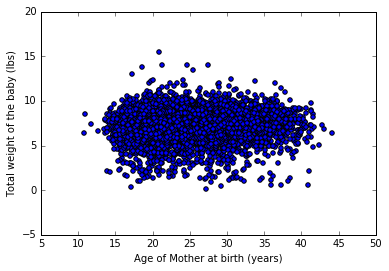

In [72]:
fig, ax = plt.subplots()
ax.scatter(df.agepreg, df.totalwgt_lb)
ax.set_ylabel("Total weight of the baby (lbs)")
ax.set_xlabel("Age of Mother at birth (years)")

That's a very blob-y looking scatter plot. It makes sens that we're also going to attempt to look at this with different statistics

Next, Plotting percentiles of birth weight vs mother's age. I'm going to assume that it's a plot like the one in the book with lines for the 25th, 50th and 75th percentile

To start, I'm going to divide the ages up into bins. 

In [73]:
bins = np.arange(10,44,5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

I'd be interested in knowing how to do this without thinkstats, but I couldn't figure it out. (I probably could have figured this out, but I felt that there were other things like the data exploration assignment that would better further my learning) As a result, this code is heavily borrowed from Allen's thinkstats book.

In [74]:
heights = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

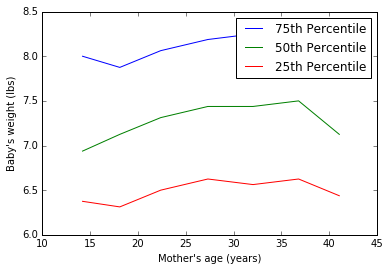

In [75]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth Percentile' % percent
    plt.plot(heights, weights, label=label)

plt.legend()
plt.xlabel("Mother's age (years)")
plt.ylabel("Baby's weight (lbs)")

Although it doesn't look like there is a great relationship between age and birthweight, it looks like as the mother's age increases, the birth weight increases as well, up until the mother is about 37 years old, and then it decreases sharply. 

Now, for the Pearson's correlation

In [78]:
#Just get a subset of the data. This makes stuff way easier to think about
df = df[["agepreg", "totalwgt_lb"]]


pearsons = thinkstats2.Corr(df.agepreg, df.totalwgt_lb)
pearsons

0.068833970354109097

Spearman's Correlation

In [80]:
spearmans = thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)
spearmans

0.094610041096582262

Again, I'm not really sure how high a correlation it has to be for something to be correlated, but it doesn't seem like mothers age and birth weight are correlated. 